In [681]:
# Initialize Otter
import otter
grader = otter.Notebook("hw04.ipynb")

# Homework 4: Text Analysis of Bloomberg Articles

## Data Cleaning and EDA

### Due Monday, July 1, 11:59 PM PT

You must submit this assignment to Gradescope by the on-time deadline, Monday, July 1, 11:59 PM PT. Please read the syllabus for the grace period policy. No late submissions beyond the grace period will be accepted. **We strongly encourage you to submit your work to Gradescope several hours before the stated deadline.** This way, you will have ample time to reach out to staff for support if you encounter difficulties with submission. While course staff is happy to help guide you with submitting your assignment ahead of the deadline, we will not respond to last-minute requests for assistance.

Please read the instructions carefully when submitting your work to Gradescope.

## Collaboration Policy

Data science is a collaborative activity. While you may talk with others about the homework, we ask that you **write your solutions individually**. If you do discuss the assignments with others, please **include their names** below.


**Collaborators**: _list collaborators here_


## This Assignment

Welcome to Homework 4! For this assignment, we will work with Bloomberg news articles on Microsoft and Microsoft stock data (MSFT).

In this assignment, you will gain practice with:

- Conducting data cleaning and EDA on a text-based dataset,
- Manipulating data in `pandas` with the `datetime` and `string` accessors,
- Writing regular expressions and using `pandas` regex methods, and
- Performing sentiment analysis on text using DistilBERT.


In [682]:
# Run this cell to set up your notebook. 
import warnings
warnings.simplefilter(action="ignore")

import re
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from ds100_utils import *

# Ensure that pandas shows at least 280 characters in columns, so we can see full articles.
pd.set_option("max_colwidth", 280)
plt.style.use("fivethirtyeight")
sns.set()
sns.set_context("talk")

### Score Breakdown

Question | Manual| Points
--- |---| ---
1a |No| 1
1b |No| 1
1c |No| 3
1d |Yes| 1
2a |No| 2
2b |No| 1
2c |No| 2
2di |No| 1
2dii |Yes| 1
3ai |No| 0.5
3aii |No| 0.5
3aii |No| 1
3b |No| 2
3ci |No| 1
3cii |Yes| 1
**Total** | **3** | **19**

## Before You Start

For each question in the assignment, please write down your answer in the answer cell(s) right below the question.

We understand that it is helpful to have extra cells breaking down the process towards reaching your final answer. If you happen to create new cells below your answer to run code, **NEVER** add cells between a question cell and the answer cell below it. It will cause errors when we run the autograder, and it will sometimes cause a failure to generate the PDF file.

**Important note: The local autograder tests will not be comprehensive. You can pass the automated tests in your notebook but still fail tests on Gradescope after the grades are released.** Please be sure to check your results carefully.

Finally, unless we state otherwise, **do not use for loops or list comprehensions**. The majority of this assignment can be done using built-in commands in `pandas` and `NumPy`.

### Debugging Guide

If you run into any technical issues, we highly recommend checking out the [Data 100 Debugging Guide](https://ds100.org/debugging-guide/). In this guide, you can find general questions about Datahub, Gradescope, and common `pandas` and RegEx errors.


<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Question 1: Importing the Data

The data for this assignment is a subset of the financial news dataset from [this github repo](https://github.com/philipperemy/financial-news-dataset). The original datasets are no longer available online due to copyright issues, but we were allowed access for educational purposes. The data in the file `data/msft_bloomberg_news.txt` has been filtered to just Bloomberg articles published between 2010 to 2013 (inclusive) with text that contains "Microsoft" or "MSFT" (Microsoft's stock name).


<br>

---

### Question 1a

Let's examine the contents of the `data/msft_bloomberg_news.txt` file. Using the [`open` function](https://docs.python.org/3/library/functions.html#open) and [`read` operation](https://docs.python.org/3/tutorial/inputoutput.html#methods-of-file-objects) on a `python` file object, read **the first 1000 characters** in `data/msft_bloomberg_news.txt` and store your result in the variable `q1a`. Then, display the result so you can read it.

**CAUTION: Viewing the contents of large files in a Jupyter Notebook could crash your browser. Be careful not to print the entire contents of the file.**


In [683]:
with open("data/msft_bloomberg_news.txt", "r") as f:
    q1a = f.read(1000)
print(q1a)

[{"id":46243185,"title":"Opera Jumps Most Ever After Report Facebook May Bid: Oslo Mover","released_at":"<date>May 29 2012<\/date> <time>09:40:58<\/time>","content":"Opera Software ASA (OPERA) , the Norwegian\nmarker of Internet browsers, surged the most on record in Oslo\nafter technology website  Pocket-Lint  reported that  Facebook Inc. (FB) \nmay try to acquire the company.  Opera gained as much as 26 percent, the biggest jump since\nit first sold shares in 2004. The Oslo-based company rose 18\npercent to 40.5 kroner at 11:37 a.m., giving it a market value\nof 4.85 billion kroner ($807 million).  Opera is the last major independent browser left, with the\nothers owned by companies such as  Microsoft Corp. (MSFT) ,  Google Inc. (GOOG)  \nand  Apple Inc. (AAPL) , said Aleksander Nilsen, an analyst at Abg Sundal\nCollier in Oslo. The company has a strong balance sheet, and\ncould be an attractive target for other companies, such as\n Mountain View , California-based Google, he said.  

In [684]:
grader.check("q1a")

q1a results: All test cases passed!

<br>

---

### Question 1b

Based on the printed output you got from `q1a`, what format is the data in? Answer this question by entering the letter corresponding to the right format in the variable `q1b` below.

**CAUTION: As a reminder, viewing the contents of large files in a Jupyter Notebook could crash your browser. Be careful not to print the entire contents of the file, and do not use the file explorer to open data files directly.**

**A.** CSV<br/>
**B.** HTML<br/>
**C.** JavaScript Object Notation (JSON)<br/>
**D.** Excel XML

Answer in the following cell. Your answer should be a string, either `"A"`, `"B"`, `"C"`, or `"D"`.


In [685]:
q1b = "C"

In [686]:
grader.check("q1b")

q1b results: All test cases passed!

<br>

---

### Question 1c

`pandas` has built-in readers for many different file formats, including the file format used here to store news articles. To learn more about these, check out the documentation for

- `pd.read_csv` [(docs)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html)
- `pd.read_html`[(docs)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_html.html)
- `pd.read_json`[(docs)](https://pandas.pydata.org/docs/reference/api/pandas.read_json.html)
- `pd.read_excel`[(docs)](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_excel.html).

For this question, use one of these functions to:
1. Load the file `msft_bloomberg_news.txt` in the data folder as a `DataFrame` into the variable `msft_news_df`.
2. Set the **index** of `msft_news_df` to correspond to the `id` of each news article.


**Hint:** If your code is taking a while to run, you should review your answers to `q1a` and `q1b`; you may have used the incorrect data loading function for the type of the given file.

In [687]:
msft_news_df = pd.read_json("data/msft_bloomberg_news.txt").set_index("id")
msft_news_df.head(1)

,title,released_at,content,path
id,,,,
46243185,Opera Jumps Most Ever After Report Facebook May Bid: Oslo Mover,<date>May 29 2012</date> <time>09:40:58</time>,"Opera Software ASA (OPERA) , the Norwegian\nmarker of Internet browsers, surged the most on record in Oslo\nafter technology website Pocket-Lint reported that Facebook Inc. (FB) \nmay try to acquire the company. Opera gained as much as 26 percent, the biggest jump since\n...",./2008_2012_msft_bloomberg_news/opera-jumps-most-on-record-after-report-of-facebook-s-interes.txt


In [688]:
grader.check("q1c")

q1c results: All test cases passed!

<!-- BEGIN QUESTION -->

<br>

---

### Question 1d

Suppose we are interested in using the news to predict future stock values. What additional data would we need to predict stock prices, and how could we connect that data to news articles? In addition, what attributes or characteristics of the news might help predict the stock value? Please refer to specific examples from `msft_news_df`. Reminder that the use of AI-assisted methods, e.g. ChatGPT, to generate written or code solutions is prohibited. Please see the [course syllabus](https://ds100.org/su24/syllabus/) for more details.

_..._

<!-- END QUESTION -->

<br/>

<hr style="border: 1px solid #fdb515;" />

## Question 2: Time Analysis

After loading in the data, we can start exploring news articles by analyzing the relationships between the release dates (date of publication) and different topics and companies.

<br>


---

### Question 2a

First, let's extract the date and time from the `released_at` column in `msft_news_df`. Notice that the date and time are encoded in the following format:

```
<date>May 29 2012</date> <time>09:40:58</time>
<date>May 18 2011</date> <time>22:42:40</time>
<date>August 15 2012</date> <time>00:09:02</time>
<date>July 1 2011</date> <time>22:12:37</time>
...
```

There are several ways to convert this to a `Timestamp` object that we can use more easily. However, for this assignment, we are going to use string manipulation functions. 

Create a regular expression that extracts the Month, Day, Year, Hour, Minute, and Second from the `msft_news_df["released_at"]` column. You should create a new `DataFrame` called `dates` that contains:
1. The same index as `msft_news_df` (`id`) and
2. Column labels: `"Month"`, `"Day"`, `"Year"`, `"Hour"`, `"Minute"`, `"Second"`.

Additionally, convert all numerical values (`"Year"`, `"Day"`, `"Hour"`, `"Minute"`, `"Second"`) to type `int`.

**Hint 1:** You should use the [`Series.str.extract`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.extract.html) function.

**Hint 2:** Don't forget to use raw strings and capture groups. Copy the above example text into [regex101.com](https://regex101.com/) to experiment with your regular expressions.

**Hint 3:** It might be helpful to break this up into a couple of steps (e.g., first extract date values such as Month, Day, and Year and then extract time values such as Hour, Minute, and Second).

In [689]:
rename_dict = {
    0: "Month",
    1: "Day",
    2: "Year",
    3: "Hour",
    4: "Minute",
    5: "Second"
}
pattern = r"<date>(\w+) (\d+) (\d+)<\/date> <time>(\d+):(\d+):(\d+).*"
dates = msft_news_df["released_at"].str.extract(pattern).rename(columns=rename_dict)
dates[["Day", "Year", "Hour", "Minute", "Second"]] = dates[["Day", "Year", "Hour", "Minute", "Second"]].astype(int)
dates.dtypes

Month     object
Day        int32
Year       int32
Hour       int32
Minute     int32
Second     int32
dtype: object

In [690]:
grader.check("q2a")

q2a results: All test cases passed!

<br>

---

### Question 2b

Now that we've figured out how to extract dates, create a new `DataFrame` called `msft_news_2010` that only contains articles released in 2010. This `DataFrame` should contain:
1. An index of `id` and
2. Columns: `"title"`, `"released_at"`, `"content"`, `"path"`, `"Month"`, `"Day"`, and `"Year"`.

**Hint:** Consider [merging](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) `msft_news_df` with `dates`.

In [691]:
msft_news_dates = pd.merge(msft_news_df, dates, on="id")
msft_news_2010 = msft_news_dates[msft_news_dates["Year"] == 2010][["title", "released_at", "content", "path", "Month", "Day", "Year"]]

msft_news_2010.head(1)

,title,released_at,content,path,Month,Day,Year
id,,,,,,,
95357231,Netflix Profit Jumps 44% on New Users,<date>April 21 2010</date> <time>23:52:36</time>,"Netflix Inc. said first-quarter\nprofit rose 44 percent as the movie subscription service signed\nup new customers and increased online offerings. \n Net income advanced to $32.3 million, or 59 cents a share,\nfrom $22.4 million, or 37 cents, a year earlier, the Los Gatos,\n...",./2008_2012_msft_bloomberg_news/netflix-quarterly-profit-increases-44-as-movie-rental-service-adds-users.txt,April,21,2010


In [692]:
grader.check("q2b")

q2b results: All test cases passed!

<br>

---

### Question 2c

After processing the article release dates, we can analyze articles about different topics and companies. Note that all the articles in the provided dataset mention Microsoft/MSFT, but they can also mention other companies.


For each company in the list of `companies` (provided below), add a boolean column to the `msft_news_df` `DataFrame` indicating whether the corresponding company is mentioned in the text of the article. Ultimately, you should add six new columns (`"amazon"`, `"nintendo"`, `"apple"`, `"sony"`, `"facebook"`, `"netflix"` ) containing `True`/`False` values to the `DataFrame`. You may use a for loop over the list of companies.

The table should look similar to the row pictured below:

<img src = "images/q2c.png" width = "1000">

**Note:** Make the contents of the articles lowercase before searching for the keywords.

In [693]:
companies = ["amazon", "nintendo", "apple", "sony", "facebook", "netflix"]

for company in companies:
    msft_news_df[company] = msft_news_df["content"].str.lower().str.contains(company)

msft_news_df.head(1)

,title,released_at,content,path,amazon,nintendo,apple,sony,facebook,netflix
id,,,,,,,,,,
46243185,Opera Jumps Most Ever After Report Facebook May Bid: Oslo Mover,<date>May 29 2012</date> <time>09:40:58</time>,"Opera Software ASA (OPERA) , the Norwegian\nmarker of Internet browsers, surged the most on record in Oslo\nafter technology website Pocket-Lint reported that Facebook Inc. (FB) \nmay try to acquire the company. Opera gained as much as 26 percent, the biggest jump since\n...",./2008_2012_msft_bloomberg_news/opera-jumps-most-on-record-after-report-of-facebook-s-interes.txt,False,False,True,False,True,False


In [694]:
grader.check("q2c")

q2c results: All test cases passed!

<br>

---

### Question 2d

Now, we can put everything together to analyze the release dates and volume of articles for different companies.


#### Question 2d, Part i

Create a new `DataFrame` called `year_news` that contains the number of articles mentioning each company in the list `companies` after 2010 (inclusive). `year_news` should have six columns (one column for each company), and the index of this `DataFrame` should be the release year `"Year"`.

In [695]:
year_news = msft_news_df.merge(dates[dates["Year"] >= 2010], on="id", how="right").groupby("Year")[companies].sum()
year_news

,amazon,nintendo,apple,sony,facebook,netflix
Year,,,,,,
2010,41,28,190,55,74,9
2011,101,29,477,104,158,43
2012,179,44,766,97,271,40
2013,152,93,687,196,238,51


In [696]:
grader.check("q2di")

q2di results: All test cases passed!

<!-- BEGIN QUESTION -->

#### Question 2d, Part ii

Given your code in the previous part is correct, after running the cell below, you should be able to see the number of articles released mentioning `companies` for each year. The plot should look like this:
<center>
<img src = "images/num_articles.png" width = "500">
</center>

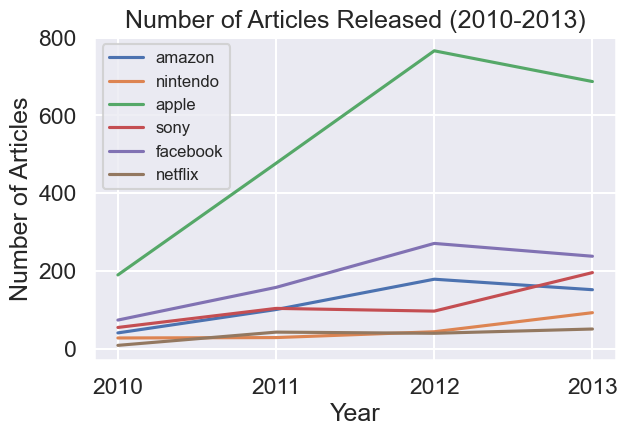

In [697]:
plt.figure(figsize=(6, 4))

for company in companies:
    sns.lineplot(data=year_news.reset_index(),
                 x="Year",
                 y=company,
                 label=company)
plt.legend(fontsize="12")
plt.xticks(np.arange(2010, 2014), np.arange(2010, 2014))
plt.ylabel("Number of Articles")
plt.xlabel("Year")
plt.title("Number of Articles Released (2010-2013)");

What trends do you notice in the plot above? Feel free to reference or Google any events to explain the trends seen in the graph. What are some limitations of using data and the corresponding plot to analyze the performance of different companies or trends?

**Hint:** Remember the source of the articles and the subset of the articles we are analyzing in this assignment.

* Microsoft had become more and more related to its competitors, especially apple.
* We can't get more details on what the contexts had said about these competitors.

<!-- END QUESTION -->

<br/>

<hr style="border: 1px solid #fdb515;" />

## Question 3: Sentiment Analysis

In this section, we will continue building on our past analysis and specifically look at the **sentiment of each article** —— this will lead us to a much more direct and detailed understanding of how these articles can be used in different applications. **Sentiment analysis** is generally the computational task of classifying the emotions in a body of text as positively or negatively charged.


We will use a fine-tuned version of the **DistilBERT** model ([github](https://github.com/huggingface/transformers/tree/main/examples/research_projects/distillation), [original paper](https://arxiv.org/abs/1910.01108)) to analyze the sentiment of Bloomberg news articles. DistilBERT is a neural network-based language model (a close relative to ChatGPT); we will use the model checkpoint specifically trained for sentiment analysis. These models are not in scope for Data 100, and we don't expect you to know how they work; take CS182: Neural Networks or Data 102: Data, Inference, and Decisions if you're interested in learning more. We are using them here to show how easy (and useful) these technologies have become.

We can use the [HuggingFace library](https://huggingface.co/) to build the sentiment analysis pipeline and load the model. [Here](https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english) is the card of the model checkpoint we will use for this assignment: the model card contains general information about the model, including the base model used, training arguments, training data, etc. Again, you don't need to know this for the course, but knowing about model cards is important when you start to use these techniques in your careers.

---

### Question 3a

As running all the articles through the model will take a while, let's first focus on articles released in 2010. We have already filtered these articles in `q2b` and assigned them to the `DataFrame` `msft_news_2010`.

Due to model input size constraints, a maximum of 512 words (tokens), and limited computational resources on Datahub, we cannot load the full articles into the pipeline. Instead, we can look at the first sentence that mentions Microsoft in each article.

#### Question 3a, Part i

Assign `microsoft_re` to a regular expression that **matches all sentences referencing "microsoft" or "msft" (in lowercase)**. You should assume all sentences end with `.`, `?`, or `!` and that these punctuation characters are not used for any other purpose. This is of course not true in practice (e.g., this example! and 3.14), but we will often make these simplifying assumptions to enable progress in data analysis.

You should develop and test your regular expression using [regex101.com](https://regex101.com/). Here are some practice sentences.

```
have you ever worked at microsoft? i once did. microsoft is known for
their research in ai. it is abbreviated as msft.
```

**Hint 1:** Consider using the negation character class `r"[^.!?]"`

**Hint 2:** Some sentences will wrap across lines, but the `.` will not match across new lines.

In [698]:
microsoft_re = r"[^.!?]*(?:microsoft|msft)[^.!?]*[.!?]"
re.findall(microsoft_re, 'the other thing. The capital of seattle is microsoft headquarters. I live near msft! The end.')

[' The capital of seattle is microsoft headquarters.', ' I live near msft!']

In [699]:
grader.check("q3ai")

q3ai results: All test cases passed!

#### Question 3a, Part ii

Now, using the regular expression from Part i, we want to extract the **first sentence** mentioning "microsoft" or "msft" from each article in `msft_news_2010`.

Specifically, you should:

1. Canonicalize the content of the articles (`content` column) by converting the text to lowercase,
2. Use the `microsoft_re` regular expression to extract the first sentence mentioning "microsoft" or "msft" in each article **without** using `Series.apply`, and
3. Create a new column `first_sentence` in `msft_news_2010` with these values. 


**Hint 1:** The `Series.str.findall` function might be useful (might take around a minute to run).

**Hint 2:** We only want the first sentence from each article that matches `microsoft_re`. Take a look at the [documentation for `Series.str.findall`](https://pandas.pydata.org/docs/reference/api/pandas.Series.str.findall.html) to see how this function handles multiple matches to `microsoft_re`.

In [700]:
msft_news_2010["first_sentence"] = msft_news_2010["content"].str.lower().str.findall(microsoft_re).str[0]

msft_news_2010.head(1)

,title,released_at,content,path,Month,Day,Year,first_sentence
id,,,,,,,,
95357231,Netflix Profit Jumps 44% on New Users,<date>April 21 2010</date> <time>23:52:36</time>,"Netflix Inc. said first-quarter\nprofit rose 44 percent as the movie subscription service signed\nup new customers and increased online offerings. \n Net income advanced to $32.3 million, or 59 cents a share,\nfrom $22.4 million, or 37 cents, a year earlier, the Los Gatos,\n...",./2008_2012_msft_bloomberg_news/netflix-quarterly-profit-increases-44-as-movie-rental-service-adds-users.txt,April,21,2010,"\n “if we had offered a pay-per-view service for new\nreleases, we would be in conflict with a broad range of\ncompanies, including wal-mart, microsoft, sony and apple,”\nhastings said."


In [701]:
grader.check("q3aii")

q3aii results: All test cases passed!

#### Question 3a, Part iii

To avoid straining DataHub too much, we have preloaded the sentiments of the sentences analyzed in this assignment, as generated by the model. You can use the `sentiment` dataframe below to access these sentiments. This dataframe contains a label and score for each corresponding sentence in `msft_news_2010`. That is, the first row of `sentiment` contains the score for the first sentence in the `first_sentence` column of `msft_news_2010`, the second row contains the score for the second sentence, and so on.

Run the following cell to see an example of the model's output for two of these sentences.

In [702]:
# Load the sentiments as generated by the model
def sentiment_analysis():
    from ds100_utils import fetch_and_cache
    import pickle
    url = "https://github.com/DS-100/sp24/raw/main/resources/assets/datasets/hw3_sentiments.pkl"
    path = fetch_and_cache(url, "tmp-sentiment.pkl")
    with open(path, "rb") as f:
        out = pickle.load(f)
    return out

sentiment = pd.DataFrame(sentiment_analysis(), index = msft_news_2010.index)
sentiment.head(2)

Using version already downloaded: Mon Aug  5 17:23:40 2024
MD5 hash of file: 87a3af05678bd284866a4623c22e7d0b


,label,score
id,,
95357231,NEGATIVE,0.998621
75227517,POSITIVE,0.624494


As you can see, the model can determine the sentiment of phrases/sentences (not just words). In addition to a sentiment label (`'NEGATIVE'` or `'POSITIVE'`), the model also measures the phrase's **polarity**, indicating how strongly negative or positive it is on a scale of 0 to 1. For example:
- for the first sentence in the `first_sentence` column, the model indicates a strong negative polarity with a score of 0.9986.
- for the second sentence, the model indicates a positive polarity (but not as strong), with a score of 0.6245.

Using this model, let's now get the **numerical** sentiment score of the first sentence that mentions "microsoft" or "msft" for each article. We calculate the numerical sentiment score by combining the sentiment label and the polarity. This new score should be negative when the label is `'NEGATIVE'`. For example, the first sentence has a numerical sentiment score of -0.9986, since its label is `'NEGATIVE'` and its polarity score is 0.9986 (as printed out above).

Add a new column `sentence_sentiment` to `msft_news_2010` with these values.

In [703]:
msft_news_2010 = pd.merge(msft_news_2010, sentiment, on="id")
msft_news_2010["label"] = msft_news_2010["label"].replace({"NEGATIVE": -1, "POSITIVE": 1})
msft_news_2010["sentence_sentiment"] = msft_news_2010["score"] * msft_news_2010["label"]
msft_news_2010 = msft_news_2010.drop(["label", "score"], axis=1)
msft_news_2010.head(1)

,title,released_at,content,path,Month,Day,Year,first_sentence,sentence_sentiment
id,,,,,,,,,
95357231,Netflix Profit Jumps 44% on New Users,<date>April 21 2010</date> <time>23:52:36</time>,"Netflix Inc. said first-quarter\nprofit rose 44 percent as the movie subscription service signed\nup new customers and increased online offerings. \n Net income advanced to $32.3 million, or 59 cents a share,\nfrom $22.4 million, or 37 cents, a year earlier, the Los Gatos,\n...",./2008_2012_msft_bloomberg_news/netflix-quarterly-profit-increases-44-as-movie-rental-service-adds-users.txt,April,21,2010,"\n “if we had offered a pay-per-view service for new\nreleases, we would be in conflict with a broad range of\ncompanies, including wal-mart, microsoft, sony and apple,”\nhastings said.",-0.998621


In [704]:
grader.check("q3aiii")

q3aiii results: All test cases passed!

<br>

---

### Question 3b

We can now turn to an alternative, more accurate way of determining the sentiment score of articles--getting the sentiment based on the entire text, rather than getting sentiment based on the first sentence including "microsoft" or "msft" in the text. Let's load in `data/article_sentiment_logs.csv`, which contains sentiment scores of the full articles as a `DataFrame` `full_sentiments`. In this file, you are provided with logs which include the `id`, `score`, and `label` ("N" for "NEGATIVE" and "P" for "POSITIVE") in the following format: 

```
<device:1> <id:77243971> <result: [0.9963290095329285 (N)]>
<device:0> <id:14799046> <result: [0.9980687499046326 (N)]>
<device:1> <id:43064156> <result: [0.997868537902832 (N)]>
<device:1> <id:29402508> <result: [0.9924335479736328 (N)]>
...
```

Run the following cell to load in the `DataFrame` and see what it contains:

In [705]:
# Run this cell; no further action is needed
full_sentiments = pd.read_csv('data/article_sentiment_logs.csv')
full_sentiments.head()

,RunNum,log
0,0,<device:0> <id:77243971> <result: [0.9963290095329285 (N)]>
1,1,<device:0> <id:14799046> <result: [0.9980687499046326 (N)]>
2,2,<device:0> <id:43064156> <result: [0.997868537902832 (N)]>
3,3,<device:0> <id:29402508> <result: [0.9924335479736328 (N)]>
4,4,<device:0> <id:71427879> <result: [0.9897157549858093 (N)]>


Using the logs you should:
1. Modify `full_sentiments` so it ultimately just contains the `id` and `content_sentiment` (a number ranging from -1 to 1).
2. Then, merge this with `msft_news_2010` so we can see the results of our two methods of calculating sentiment side by side. Assign this merged `DataFrame` to `msft_scores_2010`.
3. After the merge, make sure that only articles from 2010 appear and that **the index of the `DataFrame` is the article `id`**.

**Note 1:** You need to negate the score of negatively classified articles (indicated by "N").

**Note 2:** If you run into issues when merging, you may need to reset `full_sentiments` by running the above cell again.

**Hint 1:** The articles have a primary key `id`.

**Hint 2:** Feel free to reference how you calculated sentiment scores in `q3aii`.

In [706]:
extract = r"<.*> <id:(\d+)> <result: \[(0.\d+) \(([NP])\)\]>"
full_sentiments["id"] = full_sentiments["log"].str.findall(extract).str[0].str[0].astype("int64")
full_sentiments["label"] = full_sentiments["log"].str.findall(extract).str[0].str[2].replace({"N": -1, "P": 1})
full_sentiments["content_sentiment"] = full_sentiments["log"].str.findall(extract).str[0].str[1].astype(float) * full_sentiments["label"]
full_sentiments_to_merge = full_sentiments[["id", "content_sentiment"]]
msft_scores_2010 = pd.merge(msft_news_2010, full_sentiments_to_merge, on="id").set_index("id")
msft_scores_2010.head(1)

,title,released_at,content,path,Month,Day,Year,first_sentence,sentence_sentiment,content_sentiment
id,,,,,,,,,,
95357231,Netflix Profit Jumps 44% on New Users,<date>April 21 2010</date> <time>23:52:36</time>,"Netflix Inc. said first-quarter\nprofit rose 44 percent as the movie subscription service signed\nup new customers and increased online offerings. \n Net income advanced to $32.3 million, or 59 cents a share,\nfrom $22.4 million, or 37 cents, a year earlier, the Los Gatos,\n...",./2008_2012_msft_bloomberg_news/netflix-quarterly-profit-increases-44-as-movie-rental-service-adds-users.txt,April,21,2010,"\n “if we had offered a pay-per-view service for new\nreleases, we would be in conflict with a broad range of\ncompanies, including wal-mart, microsoft, sony and apple,”\nhastings said.",-0.998621,0.535608


In [707]:
grader.check("q3b")

q3b results: All test cases passed!

<br>

---

### Question 3c

Let's dive deeper into our two methods of calculating sentiment and analyze the accuracy of the method used in `q3b`.


#### Question 3c, Part i

Calculate the difference between `content_sentiment` and `sentence_sentiment`. Create a new column `sentiment_difference` in our `DataFrame` `msft_scores_2010` with `content_sentiment - sentence_sentiment`.


In [708]:
msft_scores_2010['sentiment_difference'] = msft_scores_2010["content_sentiment"] - msft_scores_2010["sentence_sentiment"]
msft_scores_2010.head(1)

,title,released_at,content,path,Month,Day,Year,first_sentence,sentence_sentiment,content_sentiment,sentiment_difference
id,,,,,,,,,,,
95357231,Netflix Profit Jumps 44% on New Users,<date>April 21 2010</date> <time>23:52:36</time>,"Netflix Inc. said first-quarter\nprofit rose 44 percent as the movie subscription service signed\nup new customers and increased online offerings. \n Net income advanced to $32.3 million, or 59 cents a share,\nfrom $22.4 million, or 37 cents, a year earlier, the Los Gatos,\n...",./2008_2012_msft_bloomberg_news/netflix-quarterly-profit-increases-44-as-movie-rental-service-adds-users.txt,April,21,2010,"\n “if we had offered a pay-per-view service for new\nreleases, we would be in conflict with a broad range of\ncompanies, including wal-mart, microsoft, sony and apple,”\nhastings said.",-0.998621,0.535608,1.534229


In [709]:
grader.check("q3ci")

q3ci results: All test cases passed!

<!-- BEGIN QUESTION -->

#### Question 3c, Part ii

Below we have provided a plot looking at these differences. Comment on why we see differences when calculating the sentiment of an article as the sentiment of the first sentence mentioning "microsoft" or "msft" in the article versus the sentiment of the entire article itself. How does context play a role when evaluating the sentiment of a text?

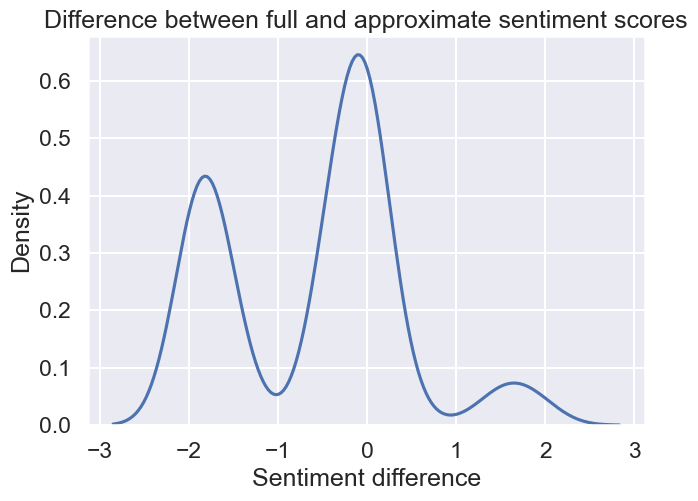

In [710]:
sns.kdeplot(msft_scores_2010['sentiment_difference'])
plt.xlabel('Sentiment difference')
plt.title('Difference between full and approximate sentiment scores');

* A single sentence taken out of context may be misinterpreted

<!-- END QUESTION -->

<hr style="border: 5px solid #003262;" />
<hr style="border: 1px solid #fdb515;" />

## Sonia says congratulations! You have finished Homework 4!

<img src = "images/sonia.jpg" width = "200">

### Course Content Feedback

If you have any feedback about this assignment or about any of our other weekly, weekly assignments, lectures, or discussions, please fill out the [Course Content Feedback Form](https://forms.gle/owfPCGgnrju1xQEA9). Your input is valuable in helping us improve the quality and relevance of our content to better meet your needs and expectations!

### Submission Instructions

Below, you will see a cell. Running this cell will automatically generate a zip file with your autograded answers. Once you submit this file to the HW 4 Coding assignment on Gradescope, Gradescope will automatically submit a PDF file with your written answers to the HW 4 Written assignment. If you run into any issues when running this cell, feel free to check this [section](https://ds100.org/debugging-guide/autograder_gradescope/autograder_gradescope.html#why-does-grader.exportrun_teststrue-fail-if-all-previous-tests-passed) in the Data 100 Debugging Guide.

**Important**: Please check that your written responses were generated and submitted correctly to the HW 4 Written Assignment.

**You are responsible for ensuring your submission follows our requirements and that the PDF for HW 4 written answers was generated/submitted correctly. We will not be granting regrade requests nor extensions to submissions that don't follow instructions.** If you encounter any difficulties with submission, please don't hesitate to reach out to staff prior to the deadline.


## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [711]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False, run_tests=True)

Running your submission against local test cases...


Your submission received the following results when run against available test cases:

    q1a results: All test cases passed!

    q1b results: All test cases passed!

    q1c results: All test cases passed!

    q2a results: All test cases passed!

    q2b results: All test cases passed!

    q2c results: All test cases passed!

    q2di results: All test cases passed!

    q3ai results: All test cases passed!

    q3aii results: All test cases passed!

    q3aiii results: All test cases passed!

    q3b results: All test cases passed!

    q3ci results: All test cases passed!
